t: 0.000 s, Suhu rata - rata : 21.88 Celcius 


Text(0.5, 1.0, ' Distribusi Suhu t: 0.000 s, suhu rata - rata =21.88')

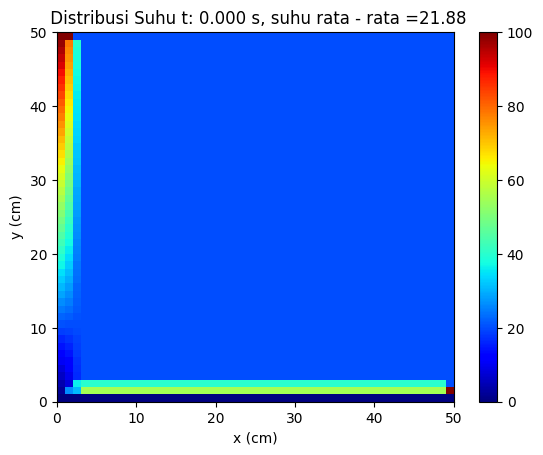

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan Variabel
a = 50 # Koefisien Difusivitas Termal
panjang = 0.5 # Panjang plat [mm]
waktu = 1.5 # Waktu simulasi [s]
node = 50 # Jumlah titik grid

dx = panjang / node # Jarak antar titik grid pada x [mm]
dy = panjang / node # Jarak antar titik grid pada y [mm]
dt = min ( dx **2 / (4 * a ) , dy **2 / (4 * a )) # Ukuran langkah waktu [s] ( pilih yanglebih kecil agar stabil )
t_nodes = int( waktu / dt ) # Jumlah iterasi simulasi
u = np . zeros (( node , node ) ) + 20 # Suhu awal plat [ degC ] (2 dimensi )

#Kondisi Awal (B.C) saat (t = 0):
u[0, :] = 0 # Suhu tepi kiri
u[1, :] = 100 # Suhu tepi kanan
u[:, 0] = np.linspace(0, 100, node) # Suhu tepi bawah (variasi linear)
u[:, 1] = np.linspace(0, 100, node) # Suhu tepi atas (variasi linear)

 # Visualisasi distribusi suhu awal
fig , ax = plt . subplots ()
ax . set_ylabel ("y (cm)")
ax . set_xlabel ("x (cm)")
pcm = ax . pcolormesh (u , cmap = plt . cm . jet , vmin =0 , vmax =100)
plt . colorbar ( pcm , ax = ax )

counter = 0
w = u . copy () # Menyalin data suhu untuk perhitungan
# Looping setiap titik grid kecuali batas
for i in range (1 , node -1) :
    for j in range (1 , node -1) :
        # Menghitung perubahan suhu berdasarkan persamaan Laplace 2D ( menggunakantetangga terdekat )
        dd_ux = ( w [i -1 , j ] - 2* w [i , j ] + w [ i +1 , j ]) / dx **2
        dd_uy = ( w [i , j -1] - 2* w [i , j ] + w [i , j +1]) / dy **2
        u [i , j ] = dt * a * ( dd_ux + dd_uy ) + w [i , j ] # Suhu baru dihitung danditambahkan ke suhu lama

t_mean = np . mean ( u )
print ( f"t: { counter :.3f} s, Suhu rata - rata : { t_mean :.2f} Celcius ")

# Memperbarui plot dan menampilkan waktu simulasi
pcm . set_array ( u )
ax . set_title ( f" Distribusi Suhu t: { counter :.3f} s, suhu rata - rata ={ t_mean :.2f}")
